# a.Regression 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
test_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [5]:
#seperating categorical and continuous features
def features(df):
    categorical_features=[]
    continuous_features=[]
    for i in df.columns:
        if i[:3]=='cat':
            categorical_features.append(i)
        elif i[:4]=='cont':
            continuous_features.append(i)
    return categorical_features,continuous_features

In [6]:
categorical_train_features,continuous_train_features=features(train_data)
categorical_test_features,continuous_test_features=features(test_data)

In [7]:
print(len(categorical_train_features))
print(len(continuous_train_features))
print(len(categorical_test_features))
print(len(continuous_test_features))

116
14
116
14


In [8]:
#Doing Label Encoding to our Categeorical features for train_data
label_encoder=LabelEncoder()
for m in categorical_train_features:
    train_data[m]=label_encoder.fit_transform(train_data[m])

In [9]:
#Doing Label Encoding to our Categeorical features for test_data
label_encoder=LabelEncoder()
for m in categorical_test_features:
    test_data[m]=label_encoder.fit_transform(test_data[m])

In [10]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [11]:
test_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,0,1,0,0,0,0,0,0,1,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,0,1,0,1,0,0,0,0,1,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,0,1,0,1,1,0,1,0,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,0,0,0,0,1,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,1,0,0,0,0,1,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [12]:
X_train=train_data.drop(['id','loss'],axis=1) 
X_test=test_data.drop(['id'],axis=1)

In [13]:
X_train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,1,0,0,0,0,0,0,1,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,1,0,0,1,0,0,0,1,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,1,0,1,0,0,0,0,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,1,0,1,0,0,0,0,1,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [14]:
X_test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,0,0,0,0,0,1,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0,1,0,1,0,0,0,0,1,0,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0,1,0,1,1,0,1,0,1,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,0,0,0,0,1,0,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,1,0,0,0,0,1,0,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


#### 1.PCA feature Engineering

In [15]:
#Adding PCA features
# Create a pca object with the 3 components as a parameter
pca=decomposition.PCA(n_components=3)
# Fit the PCA and transform the data for train and test
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

In [16]:
X_train_pca

array([[119.79290612,  41.19492389, -15.13038677],
       [-66.1838885 ,  10.56096618, -10.57981319],
       [ -2.26746073, -10.62917666,  20.23749973],
       ...,
       [-75.1827801 ,  -9.87055298,  21.99442884],
       [143.25966502,  61.11725957,  28.18021372],
       [145.56586275, -35.65092416,  38.52361092]])

In [17]:
X_test_pca

array([[ 23.40756328,  42.03615722,   7.89950909],
       [ 28.45452093,   8.76348399, -25.16611252],
       [-97.14015184,  10.33175212,  20.2339531 ],
       ...,
       [134.73840768,  29.19290216,   1.53232786],
       [-72.34175667, -23.9646531 ,  27.8022726 ],
       [-91.88578736, -31.0897236 ,  16.71225006]])

In [18]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std = sc.fit_transform(X_train_pca)
X_test_std = sc.fit_transform(X_test_pca)

In [19]:
X_train_std

array([[ 1.61376489,  1.40627584, -0.79473407],
       [-0.89158231,  0.36052091, -0.55571203],
       [-0.03054562, -0.36284942,  1.06298872],
       ...,
       [-1.01280898, -0.3369522 ,  1.15527264],
       [ 1.92989239,  2.08636689,  1.48018529],
       [ 1.96095985, -1.21701968,  2.0234794 ]])

In [20]:
X_test_std

array([[ 0.32566317,  1.50383379,  0.42491749],
       [ 0.39588014,  0.31351161, -1.35369441],
       [-1.35148495,  0.36961604,  1.08839175],
       ...,
       [ 1.87457943,  1.04436932,  0.08242448],
       [-1.00647151, -0.85732992,  1.49549443],
       [-1.27838238, -1.11222766,  0.89895805]])

In [21]:
#ADDING ABOVE 3 FEATURES TO OUR TRAIN DATA
train_data['Pca_feature1']=X_train_std[:,0]
train_data['Pca_feature2']=X_train_std[:,1]
train_data['Pca_feature3']=X_train_std[:,2]
#ADDING ABOVE 3 FEATURES TO OUR TEST DATA
test_data['Pca_feature1']=X_test_std[:,0]
test_data['Pca_feature2']=X_test_std[:,1]
test_data['Pca_feature3']=X_test_std[:,2]

In [22]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont9,cont10,cont11,cont12,cont13,cont14,loss,Pca_feature1,Pca_feature2,Pca_feature3
0,1,0,1,0,1,0,0,0,0,1,...,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,1.613765,1.406276,-0.794734
1,2,0,1,0,0,0,0,0,0,1,...,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,-0.891582,0.360521,-0.555712
2,5,0,1,0,0,1,0,0,0,1,...,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,-0.030546,-0.362849,1.062989
3,10,1,1,0,1,0,0,0,0,1,...,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,-1.001872,0.346318,1.167534
4,11,0,1,0,1,0,0,0,0,1,...,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,-1.282440,0.917827,-0.348521


In [23]:
test_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont8,cont9,cont10,cont11,cont12,cont13,cont14,Pca_feature1,Pca_feature2,Pca_feature3
0,4,0,1,0,0,0,0,0,0,1,...,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,0.325663,1.503834,0.424917
1,6,0,1,0,1,0,0,0,0,1,...,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,0.395880,0.313512,-1.353694
2,9,0,1,0,1,1,0,1,0,1,...,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,-1.351485,0.369616,1.088392
3,12,0,0,0,0,1,0,0,0,0,...,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,-0.993011,0.373795,0.910400
4,15,1,0,0,0,0,1,0,0,0,...,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,0.218285,-1.173136,-0.864722


#### 2.SVD feature Engineering

In [24]:
n_components=50
svd=TruncatedSVD(50)
#FIT THE SVD AND TRANSFORM THE DATA FOR TRAIN AND TEST
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

In [25]:
X_train_svd

array([[ 2.70016794e+02,  7.50206161e+01,  2.09508707e+01, ...,
         1.03169202e-01, -7.83282178e-03, -7.51782626e-02],
       [ 1.16903317e+02, -3.48253417e+01,  1.65345987e+01, ...,
        -8.47073457e-02,  4.75502686e-01, -3.40902847e-01],
       [ 1.73381672e+02, -1.22578154e+01, -2.53892141e+01, ...,
        -1.30446324e-01, -5.65493889e-02, -3.31992634e-01],
       ...,
       [ 1.16261375e+02, -5.47869894e+01, -1.65253382e+01, ...,
        -1.68348559e-01, -2.17027600e-01, -1.52106046e-01],
       [ 2.77233421e+02,  1.09994923e+02, -2.08282748e+01, ...,
        -3.22692080e-02,  3.23579322e-02, -4.00636499e-02],
       [ 3.16992442e+02,  3.12924228e+01, -4.91424385e+01, ...,
        -1.36954904e-01,  3.68310816e-01,  2.59039972e-01]])

In [26]:
X_test_svd

array([[ 1.76164525e+02,  3.36779764e+01,  3.77935960e+00, ...,
        -3.47491001e-02,  6.98428391e-03,  1.39321658e-01],
       [ 1.95369890e+02,  5.07072709e+00,  2.75969452e+01, ...,
        -9.77751333e-02,  7.41278050e-02,  3.53954655e-01],
       [ 8.03930703e+01, -4.59426255e+01, -9.38771999e+00, ...,
         1.53334115e+00,  3.21888722e-01,  2.33102600e-01],
       ...,
       [ 2.79651838e+02,  7.33942697e+01,  1.80059836e+00, ...,
        -1.33137890e-01, -4.56861031e-01,  3.58486374e-01],
       [ 1.19329177e+02, -6.80352577e+01, -2.15849239e+01, ...,
        -2.54515719e-02,  2.98652781e-02, -3.80688161e-03],
       [ 9.31259850e+01, -6.79570018e+01, -2.42249147e+01, ...,
        -1.70964636e-01,  2.27226383e-01,  2.24892157e-01]])

In [27]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std_svd = sc.fit_transform(X_train_svd)
X_test_std_svd = sc.fit_transform(X_test_svd)

In [28]:
X_train_std_svd

array([[ 1.379621  ,  2.04216719,  1.02355809, ...,  0.41450771,
        -0.02776513, -0.31179579],
       [-0.91104253, -0.56918807,  0.79552258, ..., -0.34709124,
         2.02149675, -1.44310188],
       [-0.06609465, -0.03269287, -1.36922578, ..., -0.53250426,
        -0.23431525, -1.40516719],
       ...,
       [-0.92064634, -1.04373401, -0.91153695, ..., -0.68614932,
        -0.91471608, -0.6393111 ],
       [ 1.48758579,  2.87360735, -1.13372035, ..., -0.13452171,
         0.14263696, -0.16229749],
       [ 2.08240305,  1.00262191, -2.59573049, ..., -0.55888823,
         1.56702111,  1.1111178 ]])

In [29]:
X_test_std_svd

array([[ 0.09065866,  1.10707373,  0.13506461, ..., -0.14497892,
         0.03400637,  0.60145681],
       [ 0.38602882,  0.39054195,  1.38730975, ..., -0.40214415,
         0.31793926,  1.51301462],
       [-1.38226467, -0.88720022, -0.55721426, ...,  6.25330236,
         1.3656572 ,  0.99974948],
       ...,
       [ 1.68224852,  2.10185608,  0.03102828, ..., -0.54643487,
        -1.92747758,  1.53226107],
       [-0.78344427, -1.44055903, -1.19850047, ..., -0.1070422 ,
         0.13076428, -0.00641775],
       [-1.18643798, -1.43859893, -1.33730193, ..., -0.70077941,
         0.96535423,  0.96487929]])

In [30]:
X_train_std_svd.shape

(188318, 50)

In [31]:
X_train_std_svd=pd.DataFrame(X_train_std_svd)
X_test_std_svd=pd.DataFrame(X_test_std_svd)

In [32]:
X_train_std_svd

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.379621,2.042167,1.023558,0.459469,1.064850,0.335264,0.109805,1.790696,0.070367,-1.812261,...,-1.293430,0.944129,1.212112,0.151955,-0.840833,1.574046,0.254690,0.414508,-0.027765,-0.311796
1,-0.911043,-0.569188,0.795523,0.557313,0.459882,-1.489698,0.302100,0.518445,-1.569131,0.583821,...,1.117633,-0.572326,-0.178976,0.071099,-0.033299,-1.122847,0.166747,-0.347091,2.021497,-1.443102
2,-0.066095,-0.032693,-1.369226,-1.192197,-1.970946,0.275540,3.541697,-0.031961,-0.393538,0.948226,...,-0.639259,-0.361985,-0.532590,-0.567427,-0.026862,0.811226,-0.430778,-0.532504,-0.234315,-1.405167
3,-1.034195,-0.625212,-0.765639,1.462330,-0.880809,-1.420901,-0.399768,0.835582,-1.144710,0.107071,...,-0.630797,1.184554,0.819222,0.326491,-0.441032,-0.430384,0.270558,0.185221,-0.263990,0.386238
4,-1.278708,-0.790655,1.239610,3.392621,0.440726,1.466224,0.826447,1.863478,0.728196,-0.023672,...,-0.128633,0.858617,0.753721,-0.559749,-0.791526,-3.322677,-0.408481,-0.835578,-0.737093,0.272414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,-1.078379,-1.733831,0.528575,0.253788,-0.183566,0.545685,0.209888,-0.007617,-0.260662,-0.646521,...,1.586218,2.130361,-0.738792,0.277919,-0.085125,0.375849,-0.281453,-0.470344,-0.400440,-0.329630
188314,-1.218802,-0.173960,0.178306,1.053329,0.312858,-0.256335,0.063752,-1.696670,-0.006872,-0.507229,...,-0.922629,0.195126,0.080626,-0.294140,0.692050,0.028145,-0.090172,-0.005985,0.007701,-0.156264
188315,-0.920646,-1.043734,-0.911537,1.314944,-1.483423,0.732249,-0.260256,0.580436,1.138827,-0.070489,...,0.584425,0.192306,-0.511789,0.413706,-0.813752,0.286033,-0.510361,-0.686149,-0.914716,-0.639311
188316,1.487586,2.873607,-1.133720,0.603398,0.038799,-1.442547,1.795803,0.337399,-0.853783,0.135038,...,1.123446,-0.784617,-0.087172,-0.443354,0.194504,-2.677394,0.042969,-0.134522,0.142637,-0.162297


In [33]:
X_test_std_svd

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.090659,1.107074,0.135065,1.450380,-0.225459,-1.416537,0.279939,0.971180,-1.170686,-0.045937,...,0.511525,0.113646,-0.195398,-0.064082,-0.438053,2.508695,-0.477224,-0.144979,0.034006,0.601457
1,0.386029,0.390542,1.387310,0.109935,-0.207738,1.368424,-0.192277,0.754379,-0.301950,-2.222885,...,-0.787799,0.447311,-0.235600,0.392818,-0.075797,-0.492376,0.568460,-0.402144,0.317939,1.513015
2,-1.382265,-0.887200,-0.557214,1.981965,-0.876155,0.990237,2.409947,1.755126,-0.688586,0.477690,...,-0.548089,0.215806,-1.986567,0.319489,0.178645,-1.451192,3.290931,6.253302,1.365657,0.999749
3,-1.047884,-0.555615,-0.558661,0.945052,0.322862,-1.600401,-1.380919,1.146043,0.900803,1.449192,...,0.069279,0.276326,-2.150035,-2.381022,0.482372,-0.168927,0.224951,-0.724111,0.640531,0.669847
4,0.373345,-0.445874,0.251067,-1.557638,-2.255142,0.680270,-0.819842,0.006027,0.027661,-2.361191,...,-1.298711,-0.633614,-0.314827,-0.238997,0.849379,-0.113902,0.038065,0.260193,0.026549,-0.127840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,0.046677,0.393239,0.663757,-0.643208,1.021701,0.309473,0.483185,-1.310070,-0.131398,-0.083365,...,-1.694559,0.159480,-1.417438,-0.044045,-1.174140,-0.723386,-0.528672,-0.097576,-0.249947,0.211443
125542,-0.792907,-1.009794,0.357173,0.054783,0.463496,-0.945437,-1.926932,0.272375,0.069228,0.754574,...,-1.031708,0.361919,1.168608,0.155070,0.008399,-0.681933,-0.570508,-0.022905,0.672598,-0.076961
125543,1.682249,2.101856,0.031028,0.283629,-0.382816,0.036836,0.173810,1.243995,0.763341,-0.533275,...,-0.760135,-1.327985,0.572463,0.512926,0.260748,-1.938942,0.309043,-0.546435,-1.927478,1.532261
125544,-0.783444,-1.440559,-1.198500,1.940380,1.370081,0.204269,-1.485441,-0.066034,-1.978245,1.136372,...,-0.776890,0.337395,-0.199682,-0.292056,0.490764,0.052270,0.238708,-0.107042,0.130764,-0.006418


In [34]:
final_train=pd.concat([train_data,X_train_std_svd], axis=1)
final_test=pd.concat([test_data,X_test_std_svd], axis=1)

In [35]:
final_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,40,41,42,43,44,45,46,47,48,49
0,1,0,1,0,1,0,0,0,0,1,...,-1.293430,0.944129,1.212112,0.151955,-0.840833,1.574046,0.254690,0.414508,-0.027765,-0.311796
1,2,0,1,0,0,0,0,0,0,1,...,1.117633,-0.572326,-0.178976,0.071099,-0.033299,-1.122847,0.166747,-0.347091,2.021497,-1.443102
2,5,0,1,0,0,1,0,0,0,1,...,-0.639259,-0.361985,-0.532590,-0.567427,-0.026862,0.811226,-0.430778,-0.532504,-0.234315,-1.405167
3,10,1,1,0,1,0,0,0,0,1,...,-0.630797,1.184554,0.819222,0.326491,-0.441032,-0.430384,0.270558,0.185221,-0.263990,0.386238
4,11,0,1,0,1,0,0,0,0,1,...,-0.128633,0.858617,0.753721,-0.559749,-0.791526,-3.322677,-0.408481,-0.835578,-0.737093,0.272414


In [36]:
final_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,40,41,42,43,44,45,46,47,48,49
0,4,0,1,0,0,0,0,0,0,1,...,0.511525,0.113646,-0.195398,-0.064082,-0.438053,2.508695,-0.477224,-0.144979,0.034006,0.601457
1,6,0,1,0,1,0,0,0,0,1,...,-0.787799,0.447311,-0.235600,0.392818,-0.075797,-0.492376,0.568460,-0.402144,0.317939,1.513015
2,9,0,1,0,1,1,0,1,0,1,...,-0.548089,0.215806,-1.986567,0.319489,0.178645,-1.451192,3.290931,6.253302,1.365657,0.999749
3,12,0,0,0,0,1,0,0,0,0,...,0.069279,0.276326,-2.150035,-2.381022,0.482372,-0.168927,0.224951,-0.724111,0.640531,0.669847
4,15,1,0,0,0,0,1,0,0,0,...,-1.298711,-0.633614,-0.314827,-0.238997,0.849379,-0.113902,0.038065,0.260193,0.026549,-0.127840


In [42]:
#SAVING THE FINAL_TRAIN data and FINAL_TEST data
final_train.to_csv('final_train.csv')
final_test.to_csv('final_test.csv')

In [2]:
final_train=pd.read_csv('final_train.csv')
final_test=pd.read_csv('final_test.csv')

In [3]:
final_train.head()

,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,1,0,1,0,0,0,0,...,-1.293430,0.944129,1.212112,0.151955,-0.840833,1.574046,0.254690,0.414508,-0.027765,-0.311796
1,1,2,0,1,0,0,0,0,0,0,...,1.117633,-0.572326,-0.178976,0.071099,-0.033299,-1.122847,0.166747,-0.347091,2.021497,-1.443102
2,2,5,0,1,0,0,1,0,0,0,...,-0.639259,-0.361985,-0.532590,-0.567427,-0.026862,0.811226,-0.430778,-0.532504,-0.234315,-1.405167
3,3,10,1,1,0,1,0,0,0,0,...,-0.630797,1.184554,0.819222,0.326491,-0.441032,-0.430384,0.270558,0.185221,-0.263990,0.386238
4,4,11,0,1,0,1,0,0,0,0,...,-0.128633,0.858617,0.753721,-0.559749,-0.791526,-3.322677,-0.408481,-0.835578,-0.737093,0.272414


In [4]:
final_test.head()

,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,40,41,42,43,44,45,46,47,48,49
0,0,4,0,1,0,0,0,0,0,0,...,0.511525,0.113646,-0.195398,-0.064082,-0.438053,2.508695,-0.477224,-0.144979,0.034006,0.601457
1,1,6,0,1,0,1,0,0,0,0,...,-0.787799,0.447311,-0.235600,0.392818,-0.075797,-0.492376,0.568460,-0.402144,0.317939,1.513015
2,2,9,0,1,0,1,1,0,1,0,...,-0.548089,0.215806,-1.986567,0.319489,0.178645,-1.451192,3.290931,6.253302,1.365657,0.999749
3,3,12,0,0,0,0,1,0,0,0,...,0.069279,0.276326,-2.150035,-2.381022,0.482372,-0.168927,0.224951,-0.724111,0.640531,0.669847
4,4,15,1,0,0,0,0,1,0,0,...,-1.298711,-0.633614,-0.314827,-0.238997,0.849379,-0.113902,0.038065,0.260193,0.026549,-0.127840


#### Train and Test split

In [5]:
Y=np.log(final_train['loss']+100)
X=final_train.drop(['Unnamed: 0','loss', 'id'], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150654, 183)
(37664, 183)
(150654,)
(37664,)


In [7]:
final_test_data=final_test.drop(['Unnamed: 0','id'],axis = 1)

In [8]:
final_test_data.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,0,0,0,0,0,1,0,...,0.511525,0.113646,-0.195398,-0.064082,-0.438053,2.508695,-0.477224,-0.144979,0.034006,0.601457
1,0,1,0,1,0,0,0,0,1,0,...,-0.787799,0.447311,-0.235600,0.392818,-0.075797,-0.492376,0.568460,-0.402144,0.317939,1.513015
2,0,1,0,1,1,0,1,0,1,1,...,-0.548089,0.215806,-1.986567,0.319489,0.178645,-1.451192,3.290931,6.253302,1.365657,0.999749
3,0,0,0,0,1,0,0,0,0,0,...,0.069279,0.276326,-2.150035,-2.381022,0.482372,-0.168927,0.224951,-0.724111,0.640531,0.669847
4,1,0,0,0,0,1,0,0,0,0,...,-1.298711,-0.633614,-0.314827,-0.238997,0.849379,-0.113902,0.038065,0.260193,0.026549,-0.127840


# Applying machine Learning Models

#### 1.Linear Regression

In [9]:
model1=SGDRegressor(loss='huber',random_state=42)
model1.fit(X_train,y_train)
y_train_predictions=model1.predict(X_train)
y_test_predictions=model1.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1338.509695863967
test MAE: 1326.6177443384963


In [10]:
predictions_on_test_data=model1.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('linear_regression_submission.csv',index=False)

#### 2.Ridge Regression

In [9]:
model2=Ridge()
model2.fit(X_train,y_train)
y_train_predictions=model2.predict(X_train)
y_test_predictions=model2.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1282.5425819563418
test MAE: 1279.3713693584416


#### with Hyperparameter tuning

In [10]:
#https://stackoverflow.com/questions/57376860/how-to-run-gridsearchcv-with-ridge-regression-in-sklearn
model2=Ridge()
param_grid={'alpha': [0.1,0.2,0.4,0.7,1,100]}
grid_search_ridge= GridSearchCV(model2,param_grid, cv = 5,scoring='neg_mean_absolute_error',n_jobs =-1)
grid_search_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.4, 0.7, 1, 100]},
             scoring='neg_mean_absolute_error')

In [11]:
grid_search_ridge.best_params_

{'alpha': 1}

In [12]:
model2=Ridge(alpha=1)
model2.fit(X_train,y_train)
y_train_predictions=model2.predict(X_train)
y_test_predictions=model2.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1282.5425819563418
test MAE: 1279.3713693584416


In [13]:
predictions_on_test_data=model2.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('ridge_regression_submission.csv',index=False)

#### 3.LAsso Regression

In [14]:
model3=Lasso()
model3.fit(X_train,y_train)
y_train_predictions=model3.predict(X_train)
y_test_predictions=model3.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1789.9421230357216
test MAE: 1775.0365742100396


#### With Hyperparameter Tuning

In [15]:
#https://stackoverflow.com/questions/57376860/how-to-run-gridsearchcv-with-ridge-regression-in-sklearn
model3=Lasso()
param_grid={'alpha': [0.1,0.2,0.4,0.7,1,100]}
grid_search_Lasso= GridSearchCV(model3,param_grid, cv = 5,scoring='neg_mean_absolute_error',n_jobs =-1)
grid_search_Lasso.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.4, 0.7, 1, 100]},
             scoring='neg_mean_absolute_error')

In [16]:
grid_search_Lasso.best_params_

{'alpha': 0.1}

In [17]:
model3=Lasso(alpha=0.1)
model3.fit(X_train,y_train)
y_train_predictions=model3.predict(X_train)
y_test_predictions=model3.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1469.7091319082172
test MAE: 1459.137970750119


In [18]:
predictions_on_test_data=model3.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('lasso_regression_submission.csv',index=False)

#### 4.KNN Regressor

In [19]:
model4=KNeighborsRegressor()
model4.fit(X_train,y_train)
y_train_predictions=model4.predict(X_train)
y_test_predictions=model4.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1367.4324746722805
test MAE: 1594.9166952734502


#### with Hyperparameter Tuning

In [20]:
#https://stackoverflow.com/questions/57376860/how-to-run-gridsearchcv-with-ridge-regression-in-sklearn
model4=KNeighborsRegressor()
param_grid={'n_neighbors': [1,3,5,7,9,11,13]}
grid_search_knn= GridSearchCV(model4,param_grid, cv = 5,scoring='neg_mean_absolute_error',n_jobs =-1)
grid_search_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             scoring='neg_mean_absolute_error')

In [21]:
grid_search_knn.best_params_

{'n_neighbors': 11}

In [22]:
model4=KNeighborsRegressor(n_neighbors=11)
model4.fit(X_train,y_train)
y_train_predictions=model4.predict(X_train)
y_test_predictions=model4.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1504.302617869369
test MAE: 1597.2807029700416


In [23]:
predictions_on_test_data=model4.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('KNN_regression_submission.csv',index=False)

#### 5.DecisionTreeRegressor

In [24]:
model5=DecisionTreeRegressor()
model5.fit(X_train,y_train)
y_train_predictions=model5.predict(X_train)
y_test_predictions=model5.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 0.000982980870073148
test MAE: 1764.8019660683942


#### with Hyperparameter Tuning

In [25]:
DT = DecisionTreeRegressor()
max_depth=[1,5,10,50,100]
min_samples_split=[5,10,100,500,1000]
parameters = {'max_depth':max_depth,'min_samples_split':min_samples_split}

clf = GridSearchCV(DT, parameters, cv= 10, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,n_jobs =-1)

clf.fit(X_train,y_train)
print(clf.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 18.4min finished


DecisionTreeRegressor(max_depth=50, min_samples_split=500)


In [26]:
model5=DecisionTreeRegressor(max_depth=50,min_samples_split=500)
model5.fit(X_train,y_train)
y_train_predictions=model5.predict(X_train)
y_test_predictions=model5.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1231.3491312947888
test MAE: 1270.5427202268365


In [27]:
predictions_on_test_data=model5.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('DecisionTree_regression_submission.csv',index=False)

#### 6.Random Forest Regressor

In [30]:
model6=RandomForestRegressor(n_jobs=-1)
model6.fit(X_train,y_train)
y_train_predictions=model6.predict(X_train)
y_test_predictions=model6.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 491.8395316620499
test MAE: 1198.5502082283672


In [31]:
predictions_on_test_data=model6.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('RandomForest_regressor_submission.csv',index=False)

#### 7.XGBoost Regressor

In [32]:
model7=XGBRegressor()
model7.fit(X_train,y_train)
y_train_predictions=model7.predict(X_train)
y_test_predictions=model7.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1055.5335252911646
test MAE: 1163.46044744208


#### Hyperparameter Tuninghttps://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [33]:
xgb=XGBRegressor()
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
clf = GridSearchCV(xgb, param_test1,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,n_jobs =-1)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 78.5min finished


{'max_depth': 5, 'min_child_weight': 1}


In [34]:
param_test2 = {'gamma':[i/10.0 for i in range(0,5)]}
clf = GridSearchCV(xgb, param_test2,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,n_jobs =-1)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 29.9min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 32.5min finished


{'gamma': 0.4}


In [35]:
param_test3 = {'subsample':[i/10.0 for i in range(6,10)],'colsample_bytree':[i/10.0 for i in range(6,10)]}
clf = GridSearchCV(xgb, param_test3,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,n_jobs =-1)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 133.8min finished


{'colsample_bytree': 0.9, 'subsample': 0.9}


In [36]:
param_test4 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
clf = GridSearchCV(xgb, param_test4,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,n_jobs =-1)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 31.1min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 34.4min finished


{'reg_alpha': 100}


In [9]:
model7=XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100)
model7.fit(X_train,y_train)
y_train_predictions=model7.predict(X_train)
y_test_predictions=model7.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1151.2502180376694
test MAE: 1162.576153756517


In [10]:
predictions_on_test_data=model7.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('XGBoost_regressor_submission.csv',index=False)

#### 8.Adaboost

In [11]:
model8=AdaBoostRegressor()
model8.fit(X_train,y_train)
y_train_predictions=model8.predict(X_train)
y_test_predictions=model8.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1525.1353678512103
test MAE: 1517.9055126693015


In [12]:
predictions_on_test_data=model8.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('adaboost_regressor_submission.csv',index=False)

#### 9.SVR

In [11]:
model9=SGDRegressor(loss='epsilon_insensitive',random_state=42)
model9.fit(X_train,y_train)
y_train_predictions=model9.predict(X_train)
y_test_predictions=model9.predict(X_test)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train1=np.exp(y_train)-100
y_test1=np.exp(y_test)-100
train_score=mean_absolute_error(y_train_predictions1,y_train1)
test_score=mean_absolute_error(y_test_predictions1,y_test1)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 256985.50410602632
test MAE: 257109.41520865084


In [12]:
predictions_on_test_data=model9.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('SVR_submission.csv',index=False)

#### Custom ensemble model

In [7]:
Y=np.log(final_train['loss']+100)
X=final_train.drop(['Unnamed: 0','loss', 'id'], axis=1)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state=42)

In [9]:
def meta_models(meta_model,predicton_set,ytrain2):
    meta_models= meta_model.fit(predicton_set,ytrain2)
    return meta_models

In [10]:
def final_prediction(meta_models,X_test):
    return meta_models.predict(X_test)

In [11]:
def prediction(base_models,Xtrain2):
    predictions_list = []
    for base_model in base_models:
        predictions = base_model.predict(Xtrain2).reshape(-1,1)
        predictions_list.append(predictions)
    return np.hstack(predictions_list)

In [12]:
def mae(y,ycap):
    mae_score = mean_absolute_error(np.exp(ycap)-100 , np.exp(y)-100)
    return mae_score

#### DecisionTree as base_model

In [14]:
def ensemble_model(X,y,X_test,y_test,ratio,base_models,meta_model):
    Xtrain1,Xtrain2,ytrain1,ytrain2=train_test_split(X,y,test_size=0.5,random_state=42)
    
    samples=[]
    for i in range(base_models):
        dk=Xtrain1.sample(frac=ratio,replace=True).index
        samples.append(dk)
    
    decision_tree_models = []
    for i in range(base_models) :
        base_model =DecisionTreeRegressor(max_depth=50,min_samples_split=500)
        
        models=base_model.fit(Xtrain1.loc[samples[i]],ytrain1[samples[i]])
        decision_tree_models.append(models)
    
    predicton_list=prediction(decision_tree_models,Xtrain2)
    
    meta_models1 = meta_models(meta_model,predicton_list,ytrain2)
    
    prediction_list1 = prediction(decision_tree_models,X_test)
    
    final_predictions = final_prediction(meta_models1,prediction_list1)
    
    mae_score=mae(y_test,final_predictions)
    print("MAE_SCORE=" ,mae_score)
    return final_predictions,mae_score,decision_tree_models,meta_models1

#### Tuning with base models as 50 and ratio as 0.3

In [14]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=2000,n_jobs=-1)
final_predictions1,mae_score1,decision_tree_models1,meta_models1=ensemble_model(X=X_train,y=y_train,X_test=X_test,
                                                                            y_test=y_test,ratio=0.3,base_models=50,
                                                                            meta_model=meta_model)

MAE_SCORE= 1221.088762255809


#### Tuning with base models as 100 and ratio as 0.3

In [15]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                         n_estimators=2000,n_jobs=-1)
final_predictions2,mae_score2,decision_tree_models2,meta_models2=ensemble_model(X=X_train,y=y_train,X_test=X_test,
                                                                            y_test=y_test,ratio=0.3,base_models=100,
                                                                            meta_model=meta_model)

MAE_SCORE= 1215.5087264173276


#### Tuning with base models as 500 and ratio as 0.3

In [16]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                         n_estimators=2000,n_jobs=-1)
final_predictions3,mae_score3,decision_tree_models3,meta_models3=ensemble_model(X=X_train,y=y_train,X_test=X_test,
                                                                            y_test=y_test,ratio=0.3,base_models=500,
                                                                            meta_model=meta_model)

MAE_SCORE= 1205.1650253263163


#### Tuning with base models as 1000 and ratio as 0.3

In [17]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                         n_estimators=2000,n_jobs=-1)
final_predictions4,mae_score4,decision_tree_models4,meta_models4=ensemble_model(X=X_train,y=y_train,X_test=X_test,
                                                                            y_test=y_test,ratio=0.3,base_models=1000,
                                                                            meta_model=meta_model)

MAE_SCORE= 1202.2671653570922


#### Tuning with base models as 1500 and ratio as 0.3

In [18]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                         n_estimators=2000,n_jobs=-1)
final_predictions5,mae_score5,decision_tree_models5,meta_models5=ensemble_model(X=X_train,y=y_train,X_test=X_test,
                                                                            y_test=y_test,ratio=0.3,base_models=1500,
                                                                            meta_model=meta_model)

MAE_SCORE= 1202.8044798370206


#### Tuning with base models as 2000 and ratio as 0.3

In [19]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                         n_estimators=2000,n_jobs=-1)
final_predictions6,mae_score6,decision_tree_models6,meta_models6=ensemble_model(X=X_train,y=y_train,X_test=X_test,
                                                                            y_test=y_test,ratio=0.3,base_models=2000,
                                                                            meta_model=meta_model)

MAE_SCORE= 1198.8217977628815


In [23]:
def Ensemble_test(X_test,base_model_list,meta_model):
    test_base_model_prediction = prediction(base_model_list,X_test)
    final_prediction1 = final_prediction(meta_model,test_base_model_prediction)
    return final_prediction1

In [3]:
prediction_test_set = Ensemble_test(final_test_data,decision_tree_models6,meta_models6)
prediction_test_set = np.exp(prediction_test_set)-100
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = prediction_test_set 
submission.to_csv('ensemble_DT_base_model_submission.csv', index=False)

#### XGBoost as Base model

In [13]:
def ensemble_model2(X,y,X_test,y_test,ratio,base_models,meta_model):
    Xtrain1,Xtrain2,ytrain1,ytrain2=train_test_split(X,y,test_size=0.5,random_state=42)
    
    samples=[]
    for i in range(base_models):
        dk=Xtrain1.sample(frac=ratio,replace=True).index
        samples.append(dk)
    
    decision_tree_models = []
    for i in range(base_models) :
        base_model=XGBRegressor()
        
        models=base_model.fit(Xtrain1.loc[samples[i]],ytrain1[samples[i]])
        decision_tree_models.append(models)
    
    predicton_list=prediction(decision_tree_models,Xtrain2)
    
    meta_models1 = meta_models(meta_model,predicton_list,ytrain2)
    
    prediction_list1 = prediction(decision_tree_models,X_test)
    
    final_predictions = final_prediction(meta_models1,prediction_list1)
    
    mae_score=mae(y_test,final_predictions)
    print("MAE_SCORE=" ,mae_score)
    return final_predictions,mae_score,decision_tree_models,meta_models1

#### Tuning with base models as 5 with sample ratio as 0.3

In [14]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions1_model2,mae_score1_model2,decision_tree_models1_model2,meta_models1_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=5,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1181.8278414693038


#### Tuning with base models as 20 with sample ratio as 0.3

In [15]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions2_model2,mae_score2_model2,decision_tree_models2_model2,meta_models2_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=20,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1168.2747859470785


#### Tuning with base models as 50 with sample ratio as 0.3

In [16]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions3_model2,mae_score3_model2,decision_tree_models3_model2,meta_models3_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=50,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1166.3178913687364


#### Tuning with base models as 100 with sample ratio as 0.3

In [17]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions4_model2,mae_score4_model2,decision_tree_models4_model2,meta_models4_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=100,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1167.2397661256912


#### Tuning with base models as 50 with sample ratio as 0.5

In [14]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions5_model2,mae_score5_model2,decision_tree_models5_model2,meta_models5_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.5,
                                                                                                         base_models=50,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1163.8207157445177


#### Tuning with base models as 50 with sample ratio as 0.7

In [15]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions6_model2,mae_score6_model2,decision_tree_models6_model2,meta_models6_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.7,
                                                                                                         base_models=50,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1161.756191127132


#### Tuning with base models as 100 with sample ratio as 0.7

In [16]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions7_model2,mae_score7_model2,decision_tree_models7_model2,meta_models7_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.7,
                                                                                                         base_models=100,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1162.114894007259


#### Tuning with base models as 50 with sample ratio as 0.9

In [17]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions8_model2,mae_score8_model2, decision_tree_models8_model2,meta_models8_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.9,
                                                                                                         base_models=50,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1160.3897581008096


#### Tuning with base models as 100 with sample ratio as 0.9

In [18]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions9_model2,mae_score9_model2,decision_tree_models9_model2,meta_models9_model2=ensemble_model2(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.9,
                                                                                                         base_models=100,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1161.1018073264927


In [19]:
def Ensemble_test2(X_test,base_model_list,meta_model):
    test_base_model_prediction = prediction(base_model_list,X_test)
    final_prediction1 = final_prediction(meta_model,test_base_model_prediction)
    return final_prediction1

In [20]:
prediction_test_set = Ensemble_test2(final_test_data,decision_tree_models8_model2,meta_models8_model2)
prediction_test_set = np.exp(prediction_test_set)-100
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = prediction_test_set 
submission.to_csv('ensemble_XGBoost_base_model_submission.csv', index=False)

#### AdaBoost as base model

In [13]:
def ensemble_model3(X,y,X_test,y_test,ratio,base_models,meta_model):
    Xtrain1,Xtrain2,ytrain1,ytrain2=train_test_split(X,y,test_size=0.5,random_state=42)
    
    samples=[]
    for i in range(base_models):
        dk=Xtrain1.sample(frac=ratio,replace=True).index
        samples.append(dk)
    
    decision_tree_models = []
    for i in range(base_models) :
        base_model=AdaBoostRegressor()
        
        models=base_model.fit(Xtrain1.loc[samples[i]],ytrain1[samples[i]])
        decision_tree_models.append(models)
    
    predicton_list=prediction(decision_tree_models,Xtrain2)
    
    meta_models1 = meta_models(meta_model,predicton_list,ytrain2)
    
    prediction_list1 = prediction(decision_tree_models,X_test)
    
    final_predictions = final_prediction(meta_models1,prediction_list1)
    
    mae_score=mae(y_test,final_predictions)
    print("MAE_SCORE=" ,mae_score)
    return final_predictions,mae_score,decision_tree_models,meta_models1

#### Tuning with base models as 5 with sample ratio as 0.3

In [14]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions1_model3,mae_score1_model3,decision_tree_models1_model3,meta_models1_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=5,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1292.8025951261366


#### Tuning with base models as 5 with sample ratio as 0.7

In [15]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions2_model3,mae_score2_model3,decision_tree_models2_model3,meta_models2_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.7,
                                                                                                         base_models=5,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1309.6631599701755


#### Tuning with base models as 5 with sample ratio as 0.9

In [16]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions3_model3,mae_score3_model3,decision_tree_models3_model3,meta_models3_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.9,
                                                                                                         base_models=5,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1312.151427104694


#### Tuning with base models as 50 with sample ratio as 0.3

In [17]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions4_model3,mae_score4_model3,decision_tree_models4_model3,meta_models4_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=50,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1247.8940336776773


#### Tuning with base models as 50 with sample ratio as 0.7

In [18]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions5_model3,mae_score5_model3,decision_tree_models5_model3,meta_models5_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.7,
                                                                                                         base_models=50,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1263.5294469468759


#### Tuning with base models as 50 with sample ratio as 0.9

In [19]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions6_model3,mae_score6_model3,decision_tree_models6_model3,meta_models6_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.9,
                                                                                                         base_models=50,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1267.6736213864283


#### Tuning with base models as 100 with sample ratio as 0.3

In [20]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions7_model3,mae_score7_model3,decision_tree_models7_model3,meta_models7_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=100,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1235.5000210917106


#### Tuning with base models as 150 with sample ratio as 0.3

In [21]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions8_model3,mae_score8_model3,decision_tree_models8_model3,meta_models8_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=150,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1231.8945039293455


#### Tuning with base models as 200 with sample ratio as 0.3

In [22]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions9_model3,mae_score9_model3,decision_tree_models9_model3,meta_models9_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=200,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1223.8832736719112


#### Tuning with base models as 300 with sample ratio as 0.3

In [23]:
meta_model = XGBRegressor(max_depth=5,min_child_weight=1,gamma=0.4,colsample_bytree=0.9,subsample=0.9,reg_alpha=100,
                          n_estimators=1500,n_jobs=-1)
final_predictions10_model3,mae_score10_model3,decision_tree_models10_model3,meta_models10_model3=ensemble_model3(X=X_train,
                                                                                                         y=y_train,
                                                                                                         X_test=X_test,
                                                                                                         y_test=y_test,
                                                                                                         ratio=0.3,
                                                                                                         base_models=300,
                                                                                                         meta_model=meta_model)

MAE_SCORE= 1223.302351067996


In [24]:
def Ensemble_test3(X_test,base_model_list,meta_model):
    test_base_model_prediction = prediction(base_model_list,X_test)
    final_prediction1 = final_prediction(meta_model,test_base_model_prediction)
    return final_prediction1

In [25]:
prediction_test_set = Ensemble_test3(final_test_data,decision_tree_models10_model3,meta_models10_model3)
prediction_test_set = np.exp(prediction_test_set)-100
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = prediction_test_set 
submission.to_csv('ensemble_adaboost_base_model_submission.csv', index=False)

In [15]:
import joblib
filename = '/final_regression_model.sav'
joblib.dump(model7, filename)

['/final_regression_model.sav']

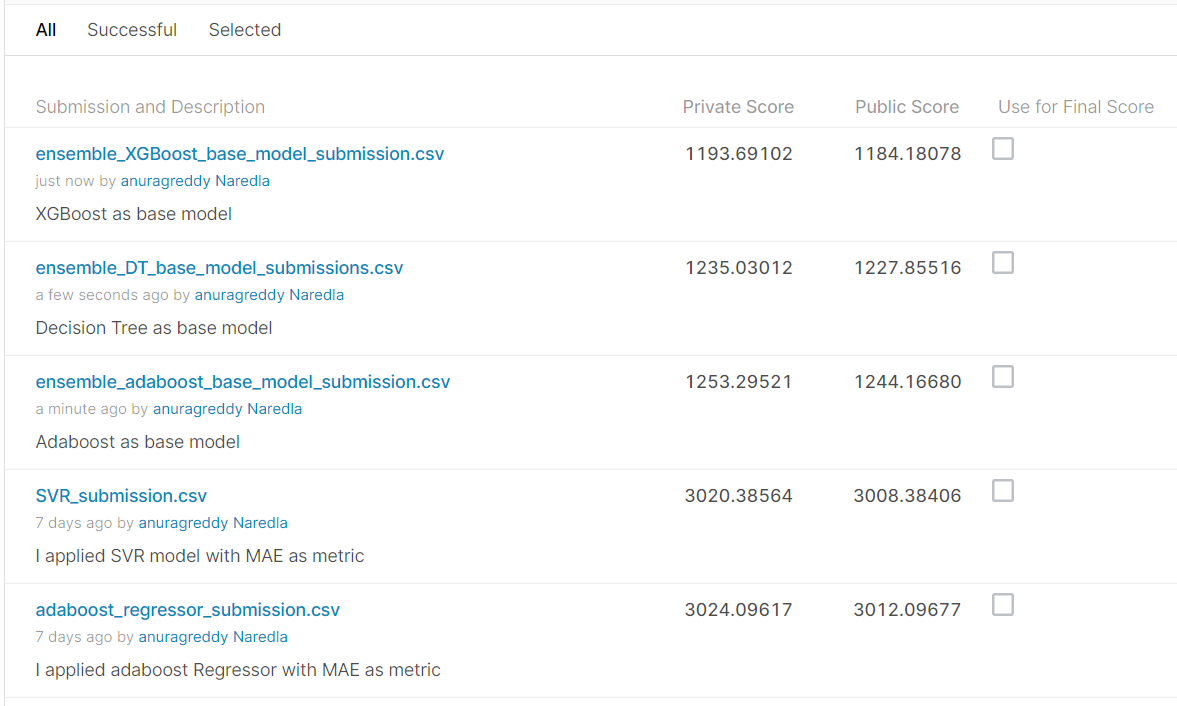

In [3]:
from IPython.display import Image
Image(filename='kaggle_scorecard1.png')

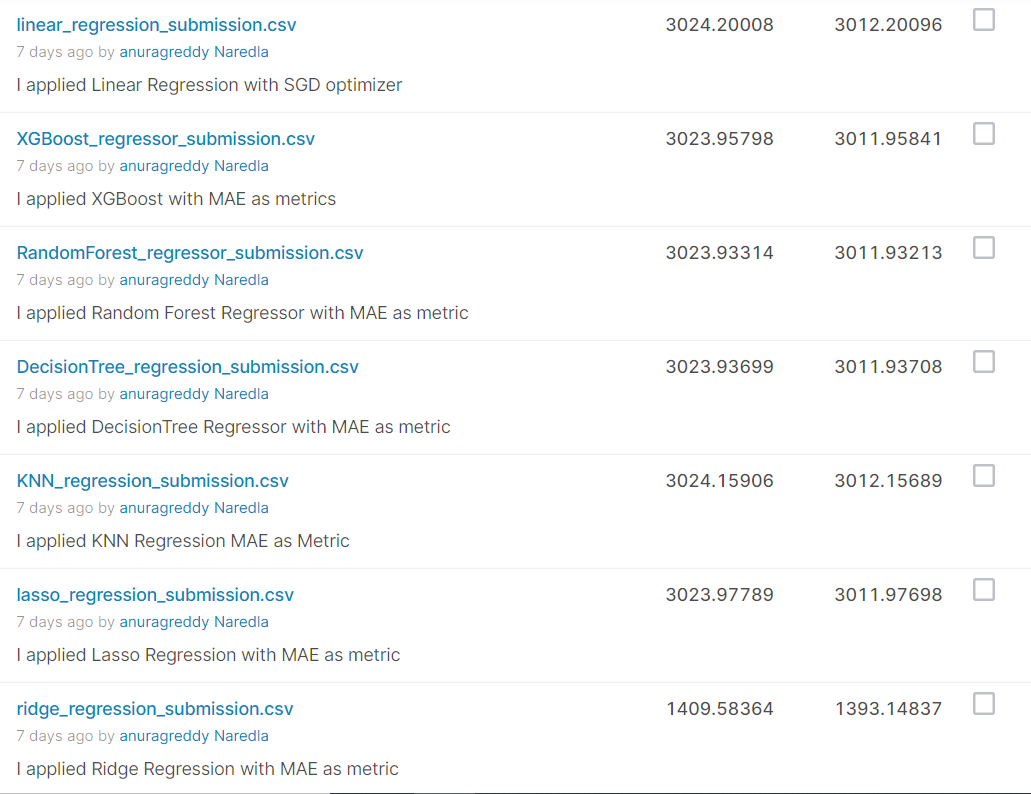

In [4]:
from IPython.display import Image
Image(filename='kaggle_scorecard2.png')

## MLP 

In [9]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import PReLU,Dropout
from tensorflow.keras import Sequential

In [10]:
#https://www.kaggle.com/mtinti/keras-starter-with-bagging-1111-84364/code
model = Sequential()
model.add(Dense(400, input_dim = X_train.shape[1], kernel_initializer = 'he_normal'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(200, kernel_initializer='he_normal'))
model.add(PReLU())
model.add(BatchNormalization())    
model.add(Dropout(0.2))
model.add(Dense(50, kernel_initializer = 'he_normal'))
model.add(PReLU())
model.add(BatchNormalization())    
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer = 'he_normal'))
model.compile(loss = 'mae', optimizer = 'adam')

In [11]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
4708/4708 [==============================] - 36s 8ms/step - loss: 1.0745 - val_loss: 0.4439
Epoch 2/20
4708/4708 [==============================] - 39s 8ms/step - loss: 0.5875 - val_loss: 0.4371
Epoch 3/20
4708/4708 [==============================] - 37s 8ms/step - loss: 0.5446 - val_loss: 0.4256
Epoch 4/20
4708/4708 [==============================] - 36s 8ms/step - loss: 0.5216 - val_loss: 0.4230
Epoch 5/20
4708/4708 [==============================] - 26s 6ms/step - loss: 0.5005 - val_loss: 0.4186
Epoch 6/20
4708/4708 [==============================] - 31s 7ms/step - loss: 0.4868 - val_loss: 0.4518
Epoch 7/20
4708/4708 [==============================] - 32s 7ms/step - loss: 0.4734 - val_loss: 0.4204
Epoch 8/20
4708/4708 [==============================] - 29s 6ms/step - loss: 0.4633 - val_loss: 0.4161
Epoch 9/20
4708/4708 [==============================] - 31s 7ms/step - loss: 0.4563 - val_loss: 0.4202
Epoch 10/20
4708/4708 [==============================] - 34s 7ms/step - l

In [12]:
predict = model.predict(X_test)
error = mean_absolute_error(np.exp(y_test)-100,np.exp(predict)-100)
print("MAE:",error)

MAE: 1183.2814333054405


In [13]:
predictions_on_test_data=model.predict(final_test_data)
prediction_on_test_data=np.exp(predictions_on_test_data)-100
submission=pd.read_csv("sample_submission.csv")
submission['loss']=predictions_on_test_data
submission.to_csv('MLP_submission.csv',index=False)

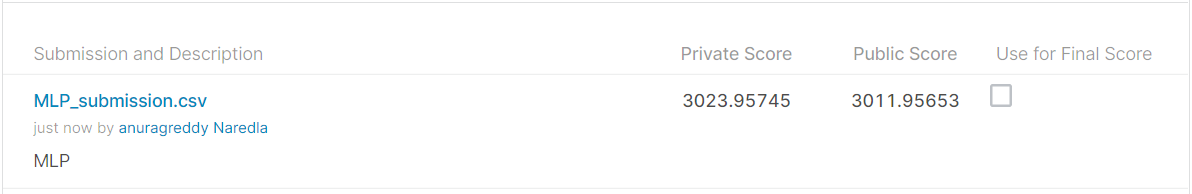

In [15]:
from IPython.display import Image
Image(filename='kaggle_scorecard_MLP.png')

# B.Classification

#### Performance Metrics

1.Binary Class log-loss

2.Confusion matrix

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
final_train=pd.read_csv('final_train.csv')
final_test=pd.read_csv('final_test.csv')

In [4]:
final_train.head()

,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,1,0,1,0,0,0,0,...,-1.293430,0.944129,1.212112,0.151955,-0.840833,1.574046,0.254690,0.414508,-0.027765,-0.311796
1,1,2,0,1,0,0,0,0,0,0,...,1.117633,-0.572326,-0.178976,0.071099,-0.033299,-1.122847,0.166747,-0.347091,2.021497,-1.443102
2,2,5,0,1,0,0,1,0,0,0,...,-0.639259,-0.361985,-0.532590,-0.567427,-0.026862,0.811226,-0.430778,-0.532504,-0.234315,-1.405167
3,3,10,1,1,0,1,0,0,0,0,...,-0.630797,1.184554,0.819222,0.326491,-0.441032,-0.430384,0.270558,0.185221,-0.263990,0.386238
4,4,11,0,1,0,1,0,0,0,0,...,-0.128633,0.858617,0.753721,-0.559749,-0.791526,-3.322677,-0.408481,-0.835578,-0.737093,0.272414


In [5]:
final_test.head()

,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,40,41,42,43,44,45,46,47,48,49
0,0,4,0,1,0,0,0,0,0,0,...,0.511525,0.113646,-0.195398,-0.064082,-0.438053,2.508695,-0.477224,-0.144979,0.034006,0.601457
1,1,6,0,1,0,1,0,0,0,0,...,-0.787799,0.447311,-0.235600,0.392818,-0.075797,-0.492376,0.568460,-0.402144,0.317939,1.513015
2,2,9,0,1,0,1,1,0,1,0,...,-0.548089,0.215806,-1.986567,0.319489,0.178645,-1.451192,3.290931,6.253302,1.365657,0.999749
3,3,12,0,0,0,0,1,0,0,0,...,0.069279,0.276326,-2.150035,-2.381022,0.482372,-0.168927,0.224951,-0.724111,0.640531,0.669847
4,4,15,1,0,0,0,0,1,0,0,...,-1.298711,-0.633614,-0.314827,-0.238997,0.849379,-0.113902,0.038065,0.260193,0.026549,-0.127840


In [6]:
final_train['loss_cat']=['0' if i<=2213.18 else '1' for i in final_train['loss']]

In [7]:
final_train.head()

,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,41,42,43,44,45,46,47,48,49,loss_cat
0,0,1,0,1,0,1,0,0,0,0,...,0.944129,1.212112,0.151955,-0.840833,1.574046,0.254690,0.414508,-0.027765,-0.311796,0
1,1,2,0,1,0,0,0,0,0,0,...,-0.572326,-0.178976,0.071099,-0.033299,-1.122847,0.166747,-0.347091,2.021497,-1.443102,0
2,2,5,0,1,0,0,1,0,0,0,...,-0.361985,-0.532590,-0.567427,-0.026862,0.811226,-0.430778,-0.532504,-0.234315,-1.405167,1
3,3,10,1,1,0,1,0,0,0,0,...,1.184554,0.819222,0.326491,-0.441032,-0.430384,0.270558,0.185221,-0.263990,0.386238,0
4,4,11,0,1,0,1,0,0,0,0,...,0.858617,0.753721,-0.559749,-0.791526,-3.322677,-0.408481,-0.835578,-0.737093,0.272414,1


In [8]:
#Dropping the loss column
final_train_categeorical=final_train.drop(['loss'],axis=1)

In [9]:
final_train_categeorical.to_csv('final_train_categorical.csv')

In [2]:
final_train=pd.read_csv('final_train_categorical.csv')

In [3]:
final_train.head()

,Unnamed: 0,Unnamed: 0.1,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,...,41,42,43,44,45,46,47,48,49,loss_cat
0,0,0,1,0,1,0,1,0,0,0,...,0.944129,1.212112,0.151955,-0.840833,1.574046,0.254690,0.414508,-0.027765,-0.311796,0
1,1,1,2,0,1,0,0,0,0,0,...,-0.572326,-0.178976,0.071099,-0.033299,-1.122847,0.166747,-0.347091,2.021497,-1.443102,0
2,2,2,5,0,1,0,0,1,0,0,...,-0.361985,-0.532590,-0.567427,-0.026862,0.811226,-0.430778,-0.532504,-0.234315,-1.405167,1
3,3,3,10,1,1,0,1,0,0,0,...,1.184554,0.819222,0.326491,-0.441032,-0.430384,0.270558,0.185221,-0.263990,0.386238,0
4,4,4,11,0,1,0,1,0,0,0,...,0.858617,0.753721,-0.559749,-0.791526,-3.322677,-0.408481,-0.835578,-0.737093,0.272414,1


In [4]:
final_train['loss_cat'].value_counts()

0    98016
1    90302
Name: loss_cat, dtype: int64

In [5]:
Y=final_train['loss_cat']
X=final_train.drop(['Unnamed: 0','Unnamed: 0.1','loss_cat','id'], axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=0.2)
X_train,X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)
print(y_cv.shape)
print(y_train.shape)
print(y_test.shape)

(120523, 183)
(37664, 183)
(30131, 183)
(30131,)
(120523,)
(37664,)


In [6]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [7]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 2,2 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(10,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(10,3))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(10,3))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [8]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

#### 1.Naive Bayes Classifier

In [9]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10,50, 100,1000]
cv_log_error_array = []
for i in alpha:
    model2 = MultinomialNB(alpha=i)
    model2.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(model2, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    predictions = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predictions, labels=model2.classes_, eps=1e-15))
    print("Log Loss :",i,log_loss(y_cv, predictions)) 

Log Loss : 1e-05 0.790650418743153
Log Loss : 0.0001 0.7906504237314039
Log Loss : 0.001 0.7906504736125318
Log Loss : 0.1 0.7906559453053564
Log Loss : 1 0.7907045012039008
Log Loss : 10 0.7911324265828019
Log Loss : 50 0.7926369221985343
Log Loss : 100 0.7942188982268619
Log Loss : 1000 0.8106083855347923


In [10]:
best_alpha = np.argmin(cv_log_error_array)
model2 = MultinomialNB(alpha=alpha[best_alpha])
model2.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(model2, method="sigmoid")
sig_clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=MultinomialNB(alpha=1e-05))

In [11]:
predict_y_train = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y_train, labels=model2.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=model2.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y_test, labels=model2.classes_, eps=1e-15))

The train log loss is: 0.5802112885336769
The cross validation log loss is: 0.790650418743153
The test log loss is: 0.5778236107092678


Log loss : 0.5778236107092678
Number of mis-classified points : 0.29662276975361085
-------------------- Confusion matrix --------------------


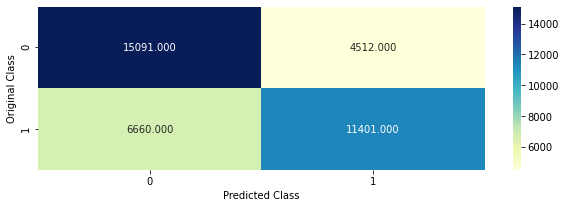

-------------------- Precision matrix (Columm Sum=1) --------------------


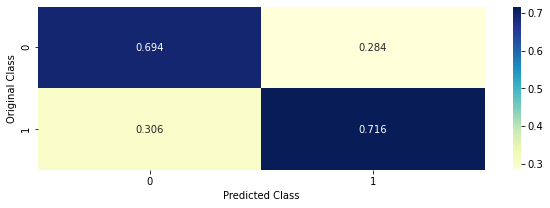

-------------------- Recall matrix (Row sum=1) --------------------


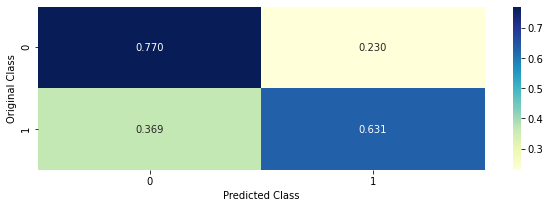

In [13]:
predict_and_plot_confusion_matrix(X_train,y_train,X_test,y_test,model2)

#### 2.Logistic Regression

In [9]:
alpha = [0.001,1,0.01,0.23,0.25,0.9,1,3,4,6,7]
cv_log_error_array = []
for i in alpha:
    model3 = SGDClassifier(alpha=i,loss='log',penalty='l2',random_state=24)
    model3.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(model3, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    probabilities = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv,probabilities, labels=model3.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv,probabilities))

Log Loss : 1.8495148884455959
Log Loss : 0.8498722358331643
Log Loss : 1.177947570728036
Log Loss : 0.6178784720832597
Log Loss : 0.621376187344684
Log Loss : 0.8216288729798201
Log Loss : 0.8498722358331643
Log Loss : 0.9443358373924288
Log Loss : 0.944639128837782
Log Loss : 0.9446946945426794
Log Loss : 0.9446981281587375


In [10]:
best_alpha = np.argmin(cv_log_error_array)
model3 = SGDClassifier(alpha=alpha[best_alpha],loss='log',penalty='l2',random_state=24)
model3.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(model3, method="sigmoid")
sig_clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.23, loss='log',
                                                    random_state=24))

In [11]:
predict_y_train = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y_train, labels=model3.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=model3.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y_test, labels=model3.classes_, eps=1e-15))

The train log loss is: 0.5504590404965357
The cross validation log loss is: 0.6178784720832597
The test log loss is: 0.5494201317121794


Log loss : 0.5494201317121794
Number of mis-classified points : 0.2892417162276975
-------------------- Confusion matrix --------------------


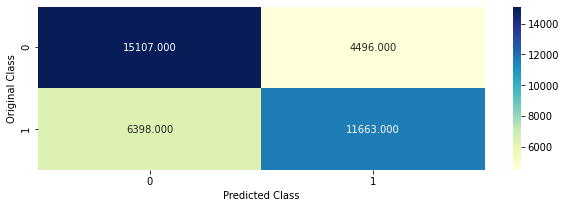

-------------------- Precision matrix (Columm Sum=1) --------------------


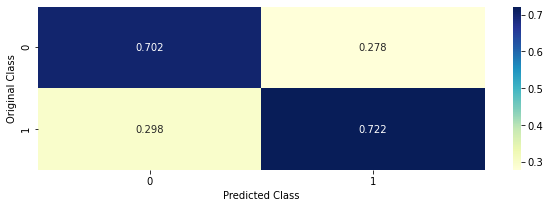

-------------------- Recall matrix (Row sum=1) --------------------


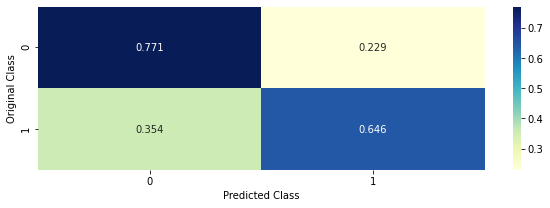

In [12]:
predict_and_plot_confusion_matrix(X_train,y_train,X_test,y_test,model3)

#### 3.SVC(Support Vector Classifier)

In [13]:
alpha = [0.001,1,0.01,0.23,0.25,0.9,1,3,4,6,7]
cv_log_error_array = []
for i in alpha:
    model4 = SGDClassifier(alpha=i,loss='hinge',penalty='l2',random_state=24)
    model4.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(model4, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    probabilities = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv,probabilities, labels=model4.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv,probabilities))

Log Loss : 4.29340703741444
Log Loss : 0.980805331235675
Log Loss : 1.038506182509311
Log Loss : 0.5914433519844589
Log Loss : 0.5907431888582046
Log Loss : 0.7925800140378693
Log Loss : 0.980805331235675
Log Loss : 7.663428069350705
Log Loss : 11.311317921635212
Log Loss : 12.515375583417145
Log Loss : 12.515832328555325


In [14]:
best_alpha = np.argmin(cv_log_error_array)
model4 = SGDClassifier(alpha=alpha[best_alpha],loss='hinge',penalty='l2',random_state=24)
model4.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(model4, method="sigmoid")
sig_clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.25,
                                                    random_state=24))

In [15]:
predict_y_train = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y_train, labels=model4.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=model4.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y_test, labels=model4.classes_, eps=1e-15))

The train log loss is: 0.5539247411921296
The cross validation log loss is: 0.5907431888582046
The test log loss is: 0.5530478443117963


Log loss : 0.5530478443117963
Number of mis-classified points : 0.2955872982158029
-------------------- Confusion matrix --------------------


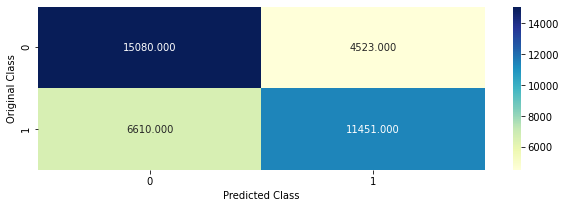

-------------------- Precision matrix (Columm Sum=1) --------------------


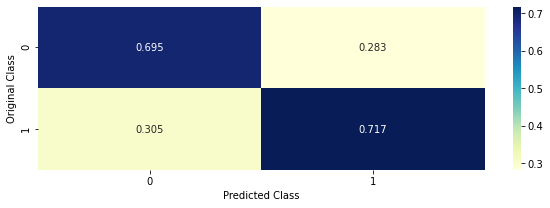

-------------------- Recall matrix (Row sum=1) --------------------


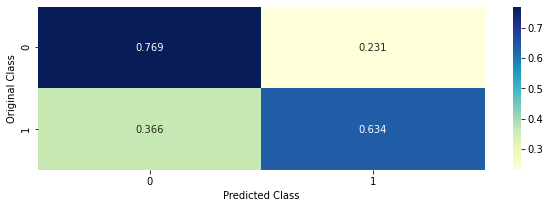

In [16]:
predict_and_plot_confusion_matrix(X_train,y_train,X_test,y_test,model4)

#### 4.Random Forest Classifier

In [9]:
alpha=[10,50,100,500,1000]
cv_log_error_array=[]
for i in alpha:
    model5=RandomForestClassifier(n_estimators=i,random_state=24,n_jobs=-1)
    model5.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(model5, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=model5.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv,predict_y))

Log Loss : 0.7285745600789975
Log Loss : 0.7082340097871066
Log Loss : 0.6987161643418182
Log Loss : 0.6990031254845579
Log Loss : 0.6965780973468285


In [10]:
best_alpha = np.argmin(cv_log_error_array)
model5 = RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=24,n_jobs=-1)
model5.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(model5, method="sigmoid")
sig_clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=24))

In [11]:
predict_y_train = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y_train, labels=model5.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=model5.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y_test, labels=model5.classes_, eps=1e-15))

The train log loss is: 0.15904935158742983
The cross validation log loss is: 0.6965780973468285
The test log loss is: 0.5290262106436658


Log loss : 0.5290262106436658
Number of mis-classified points : 0.25902718776550554
-------------------- Confusion matrix --------------------


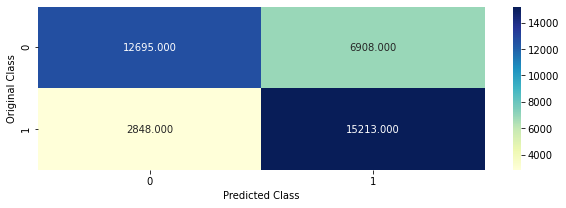

-------------------- Precision matrix (Columm Sum=1) --------------------


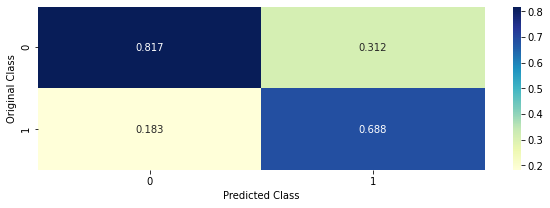

-------------------- Recall matrix (Row sum=1) --------------------


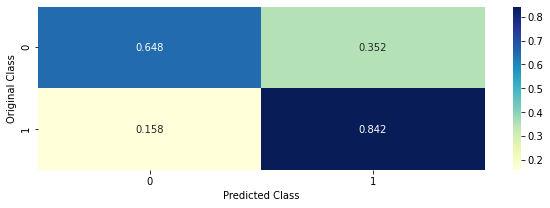

In [12]:
predict_and_plot_confusion_matrix(X_train,y_train,X_test,y_test,model5)

#### 5.XGBoost classifier

In [9]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
model6=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'min_child_weight':[1,4,7],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
model6=RandomizedSearchCV(model6,param_distributions=prams,verbose=10,n_jobs=-1,cv=5)
model6.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 108.7min remaining: 23.9min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 143.6min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 144.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [10]:
print(model6.best_params_)

{'subsample': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.1}


In [11]:
model6 =XGBClassifier(subsample=1,n_estimators=200,min_child_weight=1,max_depth=5,learning_rate=0.15,colsample_bytree=0.1)
model6.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(model6, method="sigmoid")
sig_clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.1,
                                                    gamma=0, gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.15,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=1,
                                                    missing=nan,
                                                    monotone_constraint

In [12]:
predict_y_train = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y_train, labels=model6.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=model6.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y_test, labels=model6.classes_, eps=1e-15))

The train log loss is: 0.4310201780889534
The cross validation log loss is: 0.7579208303218318
The test log loss is: 0.4653226180411692


Log loss : 0.4653226180411692
Number of mis-classified points : 0.21983857264231096
-------------------- Confusion matrix --------------------


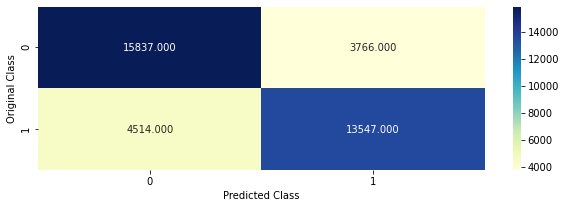

-------------------- Precision matrix (Columm Sum=1) --------------------


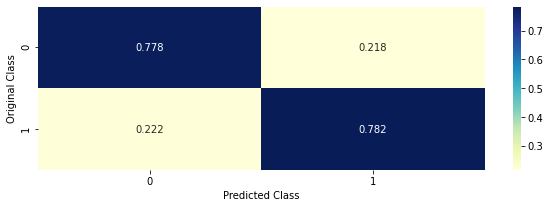

-------------------- Recall matrix (Row sum=1) --------------------


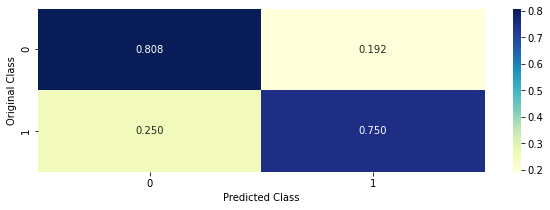

In [13]:
predict_and_plot_confusion_matrix(X_train,y_train,X_test,y_test,model6)

#### 6.Adaboost Classifier

In [11]:
model7=AdaBoostClassifier()

parameters={
    'learning_rate':[0.01,0.03,0.05],
     'n_estimators':[100,200,500]
}
model7=GridSearchCV(model7,param_grid=parameters,verbose=10,n_jobs=-1,cv=5)
model7.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed: 66.4min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed: 78.1min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 93.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 93.6min finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.05],
                         'n_estimators': [100, 200, 500]},
             verbose=10)

In [12]:
print(model7.best_params_)

{'learning_rate': 0.05, 'n_estimators': 500}


In [9]:
model7=AdaBoostClassifier(learning_rate=0.05,n_estimators=500)
model7.fit(X_train,y_train)
sig_clf=CalibratedClassifierCV(model7, method="sigmoid")
sig_clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=AdaBoostClassifier(learning_rate=0.05,
                                                         n_estimators=500))

In [10]:
predict_y_train = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y_train, labels=model7.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=model7.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y_test, labels=model7.classes_, eps=1e-15))

The train log loss is: 0.48756435831347883
The cross validation log loss is: 0.6596090731839016
The test log loss is: 0.50363621465552


Log loss : 0.5036361733417097
Number of mis-classified points : 0.24450403568394222
-------------------- Confusion matrix --------------------


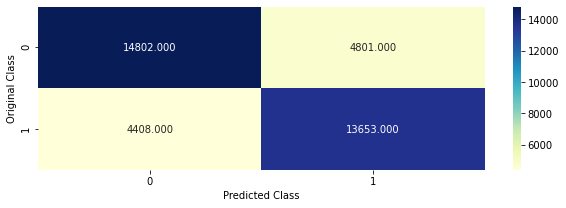

-------------------- Precision matrix (Columm Sum=1) --------------------


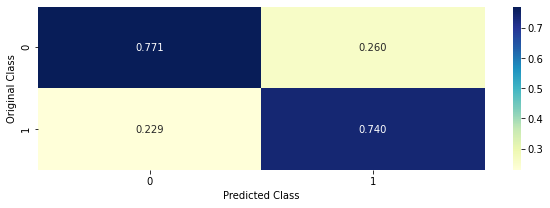

-------------------- Recall matrix (Row sum=1) --------------------


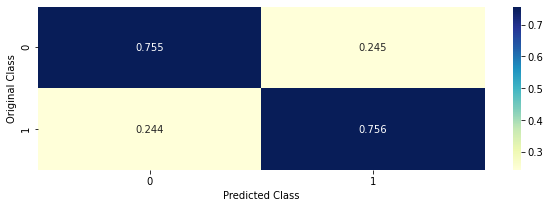

In [11]:
predict_and_plot_confusion_matrix(X_train,y_train,X_test,y_test,model7)

In [14]:
import joblib
filename = '/final_classification_model.sav'
joblib.dump(model6, filename)

['/final_classification_model.sav']

## Conclusion Table

In [14]:
from prettytable import PrettyTable
print("REGRESSION PROBLEM")
X=PrettyTable(["Model","testMAE"]) 
X.add_row(["Linear Regrssion","1326"]) 
X.add_row(["Ridge Regression","1279"])
X.add_row(["Lasso Regression","1459"])
X.add_row(["KNN Regressor","1597"]) 
X.add_row(["Decision Tree Regressor","1270"]) 
X.add_row(["Random Forest Regressor","1198"]) 

X.add_row(["Xgboost Regressor","1162"])
X.add_row(["Adaboost Regressor","1517"])
X.add_row(["Support Vector Regressor","257109"])

X.add_row(["Custom ensemble model with DecisionTree as base model","1198"])
X.add_row(["Custom ensemble model with XGBoost as base model","1160"])
X.add_row(["Custom ensemble model with AdaBoost as base model","1223"])
X.add_row(["MLP","1183"])
print(X)

print('CLASSIFICATION PROBLEM')
X1= PrettyTable(["Model","Test logloss"]) 
X1.add_row(["NaiveBayes Classifier", "0.577"]) 
X1.add_row(["Logistic Regression", "0.549"]) 
X1.add_row(["SVC Classifier", "0.553"])
X1.add_row(["Random Forest Classifier", "0.529"]) 
X1.add_row(["Xgboost Classifier", "0.465"])
X1.add_row(["Adaboost Classifier", "0.503"])
print(X1)

REGRESSION PROBLEM
+-------------------------------------------------------+---------+
|                         Model                         | testMAE |
+-------------------------------------------------------+---------+
|                    Linear Regrssion                   |   1326  |
|                    Ridge Regression                   |   1279  |
|                    Lasso Regression                   |   1459  |
|                     KNN Regressor                     |   1597  |
|                Decision Tree Regressor                |   1270  |
|                Random Forest Regressor                |   1198  |
|                   Xgboost Regressor                   |   1162  |
|                   Adaboost Regressor                  |   1517  |
|                Support Vector Regressor               |  257109 |
| Custom ensemble model with DecisionTree as base model |   1198  |
|    Custom ensemble model with XGBoost as base model   |   1160  |
|   Custom ensemble model wit